# Lab05: Multilayer Perceptrons
## Mehmet Gönen
### March 25, 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def safelog(x):
    return(np.log(x + 1e-100))

## Parameters

In [2]:
np.random.seed(421)
# mean parameters
class_means = np.array([[-4.0, +4.0],
                        [+4.0, -4.0],
                        [+2.0, +2.0],
                        [-2.0, -2.0],
                        [-4.0, -4.0],
                        [+4.0, +4.0],
                        [-2.0, +2.0],
                        [+2.0, -2.0]])
# covariance parameters
class_covariances = np.array([[[+0.4, +0.0],
                               [+0.0, +0.4]],
                              [[+0.4, +0.0],
                               [+0.0, +0.4]],
                              [[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              [[+0.8, -0.6], 
                               [-0.6, +0.8]],                              
                              [[+0.4, +0.0],
                               [+0.0, +0.4]],
                              [[+0.4, +0.0],
                               [+0.0, +0.4]],
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]]])
# sample sizes
class_sizes = np.array([200, 200])

## Data Generation

In [3]:
# generate random samples
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0] // 4)
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[0] // 4)
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[0] // 4)
points4 = np.random.multivariate_normal(class_means[3,:], class_covariances[3,:,:], class_sizes[0] // 4)
points5 = np.random.multivariate_normal(class_means[4,:], class_covariances[4,:,:], class_sizes[1] // 4)
points6 = np.random.multivariate_normal(class_means[5,:], class_covariances[5,:,:], class_sizes[1] // 4)
points7 = np.random.multivariate_normal(class_means[6,:], class_covariances[6,:,:], class_sizes[1] // 4)
points8 = np.random.multivariate_normal(class_means[7,:], class_covariances[7,:,:], class_sizes[1] // 4)
X = np.vstack((points1, points2, points3, points4, points5, points6, points7, points8))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(0, class_sizes[1])))

## Exporting Data

In [4]:
# write data to a file
np.savetxt("lab05_data_set.csv", np.hstack((X, y[:, None])), fmt = "%f,%f,%d")

## Plotting Data

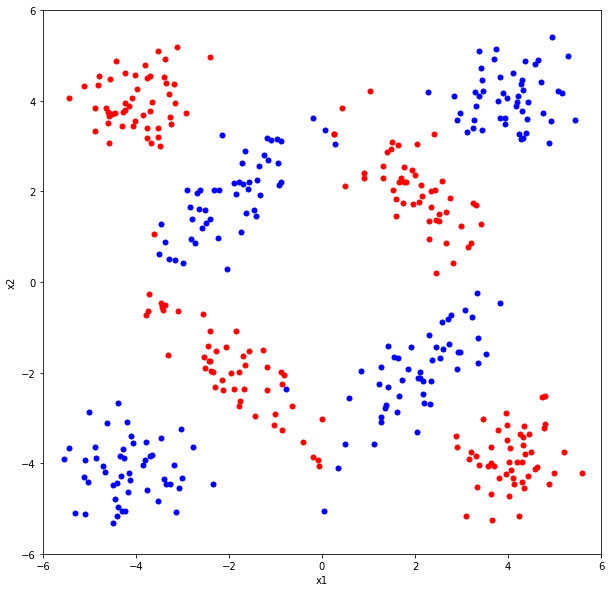

In [5]:
# plot data points generated
plt.figure(figsize = (10, 10))
plt.plot(X[y == 1, 0], X[y == 1, 1], "r.", markersize = 10)
plt.plot(X[y == 0, 0], X[y == 0, 1], "b.", markersize = 10)
plt.xlim((-6, +6))
plt.ylim((-6, +6))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Importing Data

In [6]:
# read data into memory
data_set = np.genfromtxt("lab05_data_set.csv", delimiter = ",")

# get X and y values
X = data_set[:,[0, 1]]
y_truth = data_set[:,2].astype(int)

# get number of samples and number of features
N = X.shape[0]
D = X.shape[1]

## Sigmoid Function

In [7]:
# define the sigmoid function
def sigmoid(a):
    return(1 / (1 + np.exp(-a)))

## Algorithm Parameters

In [8]:
# set learning parameters
eta = 0.1
epsilon = 0.001
H = 20
max_iteration = 200

## Parameter Initialization

In [9]:
# randomly initalize W and v
np.random.seed(421)
W = np.random.uniform(low = -0.01, high = 0.01, size = (D + 1, H))
v = np.random.uniform(low = -0.01, high = 0.01, size = H + 1)

Z = sigmoid(np.matmul(np.hstack((np.ones((N,  1)), X)), W))
y_predicted = sigmoid(np.matmul(np.hstack((np.ones((N,  1)), Z)), v))
objective_values = -np.sum(y_truth * safelog(y_predicted) + (1 - y_truth) * safelog(1 - y_predicted))

## Iterative Algorithm

\begin{align*}
\Delta v_{h} &= \eta (y_{i} - \hat{y}_{i}) z_{ih} \\
\Delta w_{hd} &= \eta (y_{i} - \hat{y}_{i}) v_{h} z_{ih} (1 - z_{ih}) x_{id}
\end{align*}

In [10]:
# learn W and v using gradient descent and online learning
iteration = 1
while True:
    v_old = v
    W_old = W
        
    for i in np.random.choice(range(N), N, replace = False):
        # calculate hidden nodes
        Z[i,:] = sigmoid(np.matmul(np.hstack((1, X[i,:])), W))
        # calculate output node
        y_predicted[i] = sigmoid(np.matmul(np.hstack((1, Z[i,:])), v))
        
        delta_v = eta * (y_truth[i] - y_predicted[i]) * np.hstack((1, Z[i,:]))
        delta_W = eta * (y_truth[i] - y_predicted[i]) * np.matmul(np.hstack((1, X[i,:])).reshape(D + 1, 1), 
                  (v[1:] * Z[i,:] * (1 - Z[i,:])).reshape(1, H))
    
        v = v + delta_v
        W = W + delta_W

    Z = sigmoid(np.matmul(np.hstack((np.ones((N,  1)), X)), W))
    y_predicted = sigmoid(np.matmul(np.hstack((np.ones((N,  1)), Z)), v))
    objective_values = np.append(objective_values, -np.sum(y_truth * safelog(y_predicted) + (1 - y_truth) * safelog(1 - y_predicted)))

    if np.sqrt(np.sum((v - v_old)**2) + np.sum((W - W_old)**2)) < epsilon or iteration >= max_iteration:
        break
        
    iteration = iteration + 1

print(W, v)

[[ -6.59988617   0.07533806  -3.3012555   -2.97828149  -3.13738123
    6.33354886 -10.76217057 -10.59573906  -6.50341412  -3.36762572
   -8.10151458   7.97658663  -8.93589099  -2.03842995  -9.23324057
   -6.94334516   6.39366314  -4.78182874   6.74658     -2.07989724]
 [ -3.2649621   -0.42928891  -0.37835292  -0.60373698  -0.63147391
   -1.93224001  -1.64423089   1.77510685  -1.76172578  -0.67094229
    1.26578384   0.51662569  -1.65023352  -0.41620519  -1.45505734
   -1.27927732  -5.0536771   -0.90651541  -4.2470923   -0.42635852]
 [ -1.84066917  -0.22820827  -0.31465113   0.30039755   0.33554815
   -5.95408523  -2.08198398  -1.53286917  -4.50644684   0.38560471
   -1.13049787  -3.60501597   1.43692713   0.06528028  -1.69281486
    1.10211815  -1.99116309   0.68282221   1.27677871   0.07763896]] [ -6.07775578   4.51946024   0.60910009  -0.95949638   0.99402258
   1.07188847  -9.69069281  -7.27473275   7.09275519   9.60743766
   1.19302134   4.24522441   9.24632572   6.36668242   0.629

## Convergence

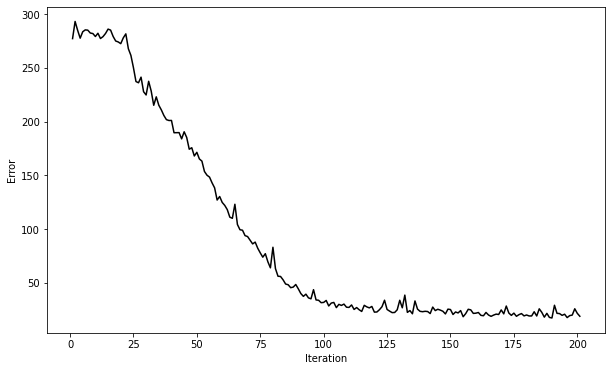

In [11]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 2), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Training Performance

In [12]:
# calculate confusion matrix
y_predicted = 1 * (y_predicted > 0.5)
confusion_matrix = pd.crosstab(y_predicted, y_truth, 
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
print(confusion_matrix)

y_truth    0    1
y_pred           
0        198    5
1          2  195


## Visualization

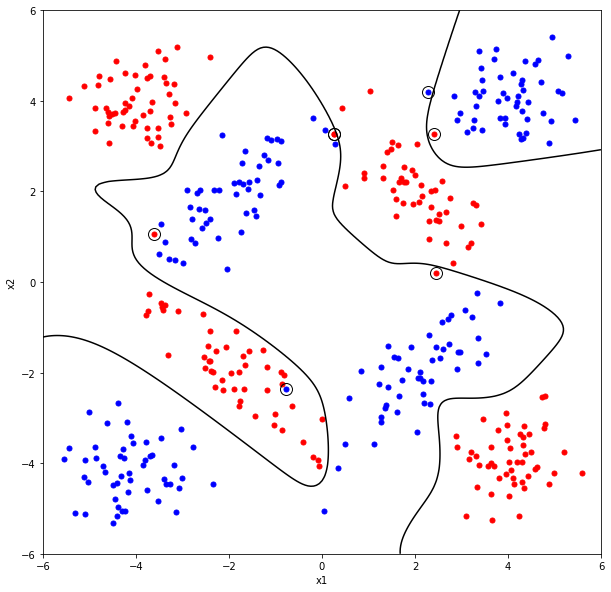

In [13]:
# evaluate discriminant function on a grid
x1_interval = np.linspace(-6, +6, 201)
x2_interval = np.linspace(-6, +6, 201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
def f(x1, x2):
    return(np.matmul(np.hstack((1, sigmoid(np.matmul(np.array([1, x1, x2]), W)))), v))

discriminant_values = np.asarray([f(x1_grid[(i, j)], x2_grid[(i, j)]) for i in range(201) for j in range(201)]).reshape(201, 201)

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 0, 0], X[y_truth == 0, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values, levels = 0, colors = "k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()